## Step-1: Scraping mobilephones from ebay website

In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_ebay_info(base_url, num_pages):
    # Initialize lists to store data
    titles = []
    conditions = []
    prices = []
    
    try:
        # Loop through each page
        for page in range(1, num_pages + 1):
            # Construct the URL for the current page
            url = base_url + "&_pgn=" + str(page)
            
            # Send a GET request to the eBay URL
            response = requests.get(url)
            
            # Raise an exception for bad status codes
            response.raise_for_status()
            
            # Parse the HTML content of the page
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Find all the item containers
            items = soup.find_all('div', class_='s-item__info')
            
            # Loop through each item and extract title, condition, and price
            for item in items:
                # Extract title
                title_element = item.find('div', class_='s-item__title')
                title = title_element.text.strip() if title_element else "Title not found"
                titles.append(title)
                
                # Extract condition
                condition_element = item.find('span', class_='SECONDARY_INFO')
                condition = condition_element.text.strip() if condition_element else "Condition not found"
                conditions.append(condition)
                
                # Extract price
                price_element = item.find('span', class_='s-item__price')
                price = price_element.text.strip() if price_element else "Price not found"
                prices.append(price)
    
    except requests.exceptions.RequestException as e:
        print("Failed to retrieve page:", e)
    
    # Create DataFrame
    df = pd.DataFrame({
        'Title': titles,
        'Condition': conditions,
        'Price': prices
    })
    
    return df

# Base URL of the eBay search results page
base_url = "https://www.ebay.ca/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=smartphones&_sacat=0&_odkw=books&_osacat=0"

# Number of pages to scrape
num_pages = 100

# Call the function to scrape information and create DataFrame
ebays_df = scrape_ebay_info(base_url, num_pages)

# Save DataFrame to CSV file
ebays_df.to_csv('smartphones_in_ebay.csv', index=False)


In [43]:
ebays_df.head() # displays first five rows of a dataframe

,Title,Condition,Price
0,Shop on eBay,Brand New,$20.00
1,LG G6 - 32GB - Astro Black Unlocked Smartphone...,Very Good - Refurbished,C $89.99
2,Motorola Edge 2023 5G - 256GB - Eclipse Black ...,Brand New,C $389.99
3,Apple iPhone 7 - 128GB - All Colors - Unlocked...,Pre-Owned,C $117.72 to C $165.08
4,"S23 Ultra Smartphone 7.3"" 16GB+1T 5G Unlocked ...",Brand New,C $230.02


In [44]:
ebays_df.shape # display number of rows and columns in a dataframe

(8298, 3)

## Step2: data wrangling

In [45]:
missing_values=ebays_df.isnull().sum() # display the count of null vakues in each column of a dataframe.
print(missing_values)

Title        0
Condition    0
Price        0
dtype: int64


In [46]:
ebays_df.head() 

,Title,Condition,Price
0,Shop on eBay,Brand New,$20.00
1,LG G6 - 32GB - Astro Black Unlocked Smartphone...,Very Good - Refurbished,C $89.99
2,Motorola Edge 2023 5G - 256GB - Eclipse Black ...,Brand New,C $389.99
3,Apple iPhone 7 - 128GB - All Colors - Unlocked...,Pre-Owned,C $117.72 to C $165.08
4,"S23 Ultra Smartphone 7.3"" 16GB+1T 5G Unlocked ...",Brand New,C $230.02


In [47]:
# Split the strings based on the keyword "to" and keep only the second part(We are considering the maximum price of a product)
ebays_df['Price'] = ebays_df['Price'].str.split(" to ").str[-1]
ebays_df.head()

,Title,Condition,Price
0,Shop on eBay,Brand New,$20.00
1,LG G6 - 32GB - Astro Black Unlocked Smartphone...,Very Good - Refurbished,C $89.99
2,Motorola Edge 2023 5G - 256GB - Eclipse Black ...,Brand New,C $389.99
3,Apple iPhone 7 - 128GB - All Colors - Unlocked...,Pre-Owned,C $165.08
4,"S23 Ultra Smartphone 7.3"" 16GB+1T 5G Unlocked ...",Brand New,C $230.02


In [48]:
ebays_df['Price'].head() # displays first five values present in the Price column

0       $20.00
1     C $89.99
2    C $389.99
3    C $165.08
4    C $230.02
Name: Price, dtype: object

In [49]:
# Use regular expression to extract digits from each string in the 'Price' column
ebays_df['Price(in CAD)'] = ebays_df['Price'].str.extract(r'(\d+\.\d+|\d+)')

In [50]:
ebays_df.head() 

,Title,Condition,Price,Price(in CAD)
0,Shop on eBay,Brand New,$20.00,20.00
1,LG G6 - 32GB - Astro Black Unlocked Smartphone...,Very Good - Refurbished,C $89.99,89.99
2,Motorola Edge 2023 5G - 256GB - Eclipse Black ...,Brand New,C $389.99,389.99
3,Apple iPhone 7 - 128GB - All Colors - Unlocked...,Pre-Owned,C $165.08,165.08
4,"S23 Ultra Smartphone 7.3"" 16GB+1T 5G Unlocked ...",Brand New,C $230.02,230.02


In [51]:
ebays_df = ebays_df.drop('Price', axis=1) # deleting the price column in the dataframe

In [52]:
ebays_df.head()

,Title,Condition,Price(in CAD)
0,Shop on eBay,Brand New,20.00
1,LG G6 - 32GB - Astro Black Unlocked Smartphone...,Very Good - Refurbished,89.99
2,Motorola Edge 2023 5G - 256GB - Eclipse Black ...,Brand New,389.99
3,Apple iPhone 7 - 128GB - All Colors - Unlocked...,Pre-Owned,165.08
4,"S23 Ultra Smartphone 7.3"" 16GB+1T 5G Unlocked ...",Brand New,230.02


In [53]:
import pandas as pd

# converting object datatype to float in a price column.
ebays_df['Price(in CAD)'] = pd.to_numeric(ebays_df['Price(in CAD)'], errors='coerce') 

# Check data type after conversion
print(ebays_df['Price(in CAD)'].dtype)


float64


In [54]:
ebays_df.isnull().sum()

Title            0
Condition        0
Price(in CAD)    0
dtype: int64

In [55]:
ebays_df.head()

,Title,Condition,Price(in CAD)
0,Shop on eBay,Brand New,20.00
1,LG G6 - 32GB - Astro Black Unlocked Smartphone...,Very Good - Refurbished,89.99
2,Motorola Edge 2023 5G - 256GB - Eclipse Black ...,Brand New,389.99
3,Apple iPhone 7 - 128GB - All Colors - Unlocked...,Pre-Owned,165.08
4,"S23 Ultra Smartphone 7.3"" 16GB+1T 5G Unlocked ...",Brand New,230.02


In [56]:
ebays_df['Condition'].value_counts() #Count the occurrences of each value in the 'Condition' column

Pre-Owned                  3035
Brand New                  1800
Very Good - Refurbished    1308
Condition not found         800
Good - Refurbished          447
Excellent - Refurbished     396
New (Other)                 212
Parts Only                  200
Open Box                    100
Name: Condition, dtype: int64

## Step-3: Data Visualization

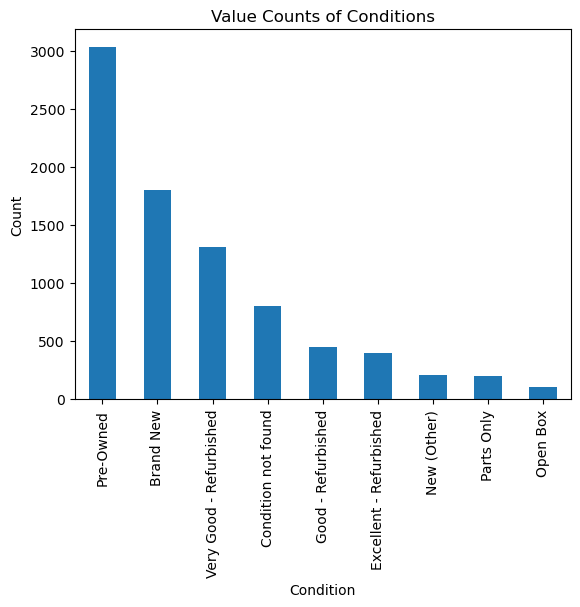

In [57]:
import matplotlib.pyplot as plt

# Get value counts of 'Condition' column
condition_counts = ebays_df['Condition'].value_counts()

# Plot the value counts
condition_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Value Counts of Conditions')

# Show the plot
plt.show()


Insights: Overall, the prominence of preowned items on eBay reflects the platform's role as a marketplace that caters to both sellers looking to offload their used items and buyers seeking affordable alternatives to new products.

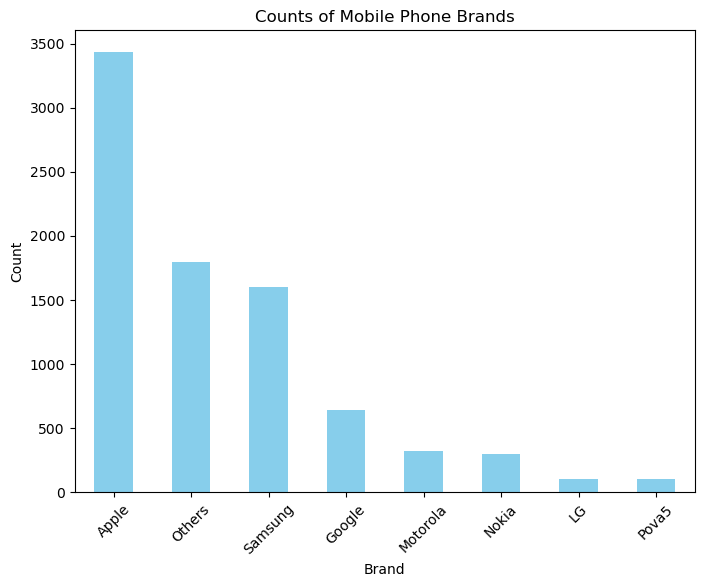

In [58]:

# Define brands
brands = ['Samsung', 'Apple', 'LG', 'Motorola', 'Nokia', 'Google', 'Pova5']

# Extract brand names
ebays_df['Brand'] = ebays_df['Title'].apply(lambda x: next((brand for brand in brands if brand in x), 'Others'))

# Plot
plt.figure(figsize=(8, 6))
ebays_df['Brand'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Mobile Phone Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Insights: Looking at the bar graph, it's evident that most folks in North America have a strong inclination toward buying Apple and Samsung gadgets. The preference is shining through in the graph, where the number of listings for Apple and Samsung products stands out prominently compared to other brands. This tells that the majority of consumers in North America lean towards choosing mobile devices made by Apple and Samsung.

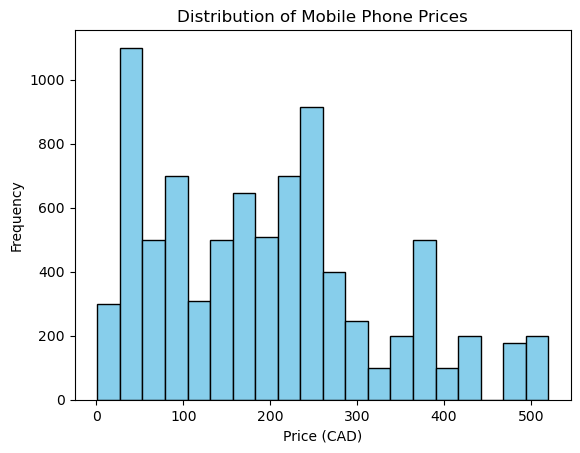

In [59]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named ebays_df and the price column is 'Price(in CAD)'
ebays_df['Price(in CAD)'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Price (CAD)')
plt.ylabel('Frequency')
plt.title('Distribution of Mobile Phone Prices')

# Show the plot
plt.show()


Insights:

The most frequent price range for mobile phones on eBay falls between CAD 0 to 100, suggesting that lower-priced phones are more commonly listed or that this price range is more popular among eBay listings.

There is a significant number of phones in the CAD 200 to 300 price range, indicating a healthy market for mid-range priced phones.

The histogram shows a roughly multimodal distribution, with noticeable peaks in the lower and mid-range price categories. This might suggest that both budget and moderately priced phones have substantial representation on the platform.

Higher-priced phones (above CAD 400) are less frequent, implying either a lower supply or demand for premium or high-end mobile phones in the eBay marketplace.

The frequency steadily decreases as the price increases, which is typical in consumer electronics markets where premium devices are less commonly purchased compared to budget and mid-range devices.

### Step-5 : Label Encoding

In [60]:
import pandas as pd

# Label Encoding
label_encoded = pd.factorize(ebays_df['Condition'])[0]
ebays_df['Condition_LabelEncoded'] = label_encoded

# One-Hot Encoding
one_hot_encoded = pd.get_dummies(ebays_df['Condition'], prefix='Condition')
ebays_df = pd.concat([ebays_df, one_hot_encoded], axis=1)

In [61]:
ebays_df.head()

,Title,Condition,Price(in CAD),Brand,Condition_LabelEncoded,Condition_Brand New,Condition_Condition not found,Condition_Excellent - Refurbished,Condition_Good - Refurbished,Condition_New (Other),Condition_Open Box,Condition_Parts Only,Condition_Pre-Owned,Condition_Very Good - Refurbished
0,Shop on eBay,Brand New,20.00,Others,0,1,0,0,0,0,0,0,0,0
1,LG G6 - 32GB - Astro Black Unlocked Smartphone...,Very Good - Refurbished,89.99,LG,1,0,0,0,0,0,0,0,0,1
2,Motorola Edge 2023 5G - 256GB - Eclipse Black ...,Brand New,389.99,Motorola,0,1,0,0,0,0,0,0,0,0
3,Apple iPhone 7 - 128GB - All Colors - Unlocked...,Pre-Owned,165.08,Apple,2,0,0,0,0,0,0,0,1,0
4,"S23 Ultra Smartphone 7.3"" 16GB+1T 5G Unlocked ...",Brand New,230.02,Others,0,1,0,0,0,0,0,0,0,0


## Step-6: Identifying Outliers

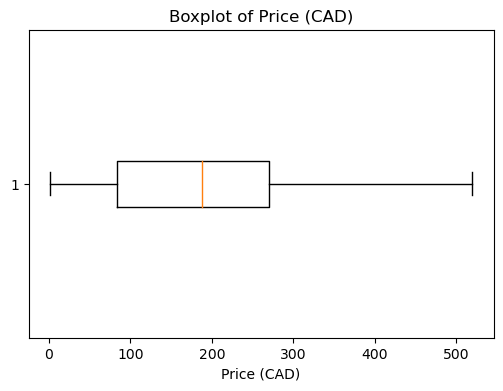

[]


In [63]:

# Boxplot for 'Price(in CAD)'
plt.figure(figsize=(6, 4))
plt.boxplot(ebays_df['Price(in CAD)'], vert=False)
plt.xlabel('Price (CAD)')
plt.title('Boxplot of Price (CAD)')
plt.show()

# Calculate IQR
Q1 = ebays_df['Price(in CAD)'].quantile(0.25)
Q3 = ebays_df['Price(in CAD)'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ebays_df[(ebays_df['Price(in CAD)'] < lower_bound) | (ebays_df['Price(in CAD)'] > upper_bound)]

print(outliers['Price(in CAD)'].tolist())

## Step7- Addressing the Outliers

In [64]:
import numpy as np
# Quantile-based Flooring and Capping
Q1 = ebays_df['Price(in CAD)'].quantile(0.05)
Q3 = ebays_df['Price(in CAD)'].quantile(0.95)
ebays_df['Price_Capped'] = ebays_df['Price(in CAD)'].clip(lower=Q1, upper=Q3)

# Trimming
trim_lower = ebays_df['Price(in CAD)'].quantile(0.05)
trim_upper = ebays_df['Price(in CAD)'].quantile(0.95)
ebays_df_trimmed = ebays_df[(ebays_df['Price(in CAD)'] >= trim_lower) & (ebays_df['Price(in CAD)'] <= trim_upper)]

# Log Transformation
ebays_df['Price_Log'] = np.log(ebays_df['Price(in CAD)'])

# Print summary statistics
print("Original:")
print(ebays_df['Price(in CAD)'].describe())
print("\nCapped:")
print(ebays_df['Price_Capped'].describe())
print("\nTrimmed:")
print(ebays_df_trimmed['Price(in CAD)'].describe())
print("\nLog Transformation:")
print(ebays_df['Price_Log'].describe())


Original:
count    8298.000000
mean      195.393366
std       131.054639
min         1.000000
25%        83.330000
50%       187.930000
75%       269.990000
max       519.990000
Name: Price(in CAD), dtype: float64

Capped:
count    8298.000000
mean      192.555106
std       123.120056
min        27.000000
25%        83.330000
50%       187.930000
75%       269.990000
max       430.300000
Name: Price_Capped, dtype: float64

Trimmed:
count    7622.000000
mean      187.343147
std       112.286986
min        27.000000
25%        87.950000
50%       187.930000
75%       257.090000
max       430.300000
Name: Price(in CAD), dtype: float64

Log Transformation:
count    8298.000000
mean        4.938807
std         1.001426
min         0.000000
25%         4.422809
50%         5.236070
75%         5.598385
max         6.253810
Name: Price_Log, dtype: float64


Observation:

Despite not finding any clear outliers, it's prudent to take measures to ensure robustness in our data analysis. We employ three different techniques to address potential outliers: Quantile-based Flooring and Capping, Trimming, and Log Transformation.

• Quantile-based Flooring and Capping: This technique involves identifying the lower and upper quantiles of the data and capping extreme values beyond these quantiles. After capping, the mean and standard deviation are slightly reduced compared to the original data. This indicates a decrease in the influence of extreme values, resulting in a narrower range of values.

• Trimming: Trimming entails removing extreme values beyond certain quantiles, effectively trimming the tails of the distribution. After trimming, the mean and standard deviation are further reduced, reflecting the exclusion of outliers from the dataset. The range of values becomes narrower, indicating the removal of extreme values.

• Log Transformation: Log transformation is applied to compress the range of values, particularly for large outliers. After transformation, the mean and standard deviation are decreased compared to the original data. The distribution of values becomes more symmetrical, as evident from the decrease in skewness and kurtosis.

In [65]:
ebays_df.shape

(8298, 16)

## Step 8: Using unsupervised learning method

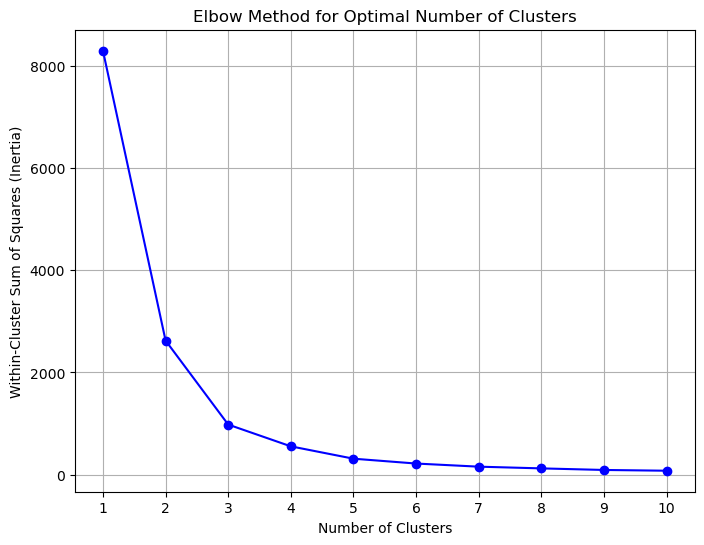

In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical columns for clustering
numerical_columns = ['Price(in CAD)']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ebays_df[numerical_columns])

# Calculate inertia for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):  # Try different numbers of clusters from 1 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
numerical_columns = ['Price(in CAD)']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ebays_df[numerical_columns])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
ebays_df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster distribution
cluster_counts = ebays_df['KMeans_Cluster'].value_counts()
print("Cluster Counts for K-Means:")
print(cluster_counts)

Cluster Counts for K-Means:
0    3614
1    3208
2    1476
Name: KMeans_Cluster, dtype: int64


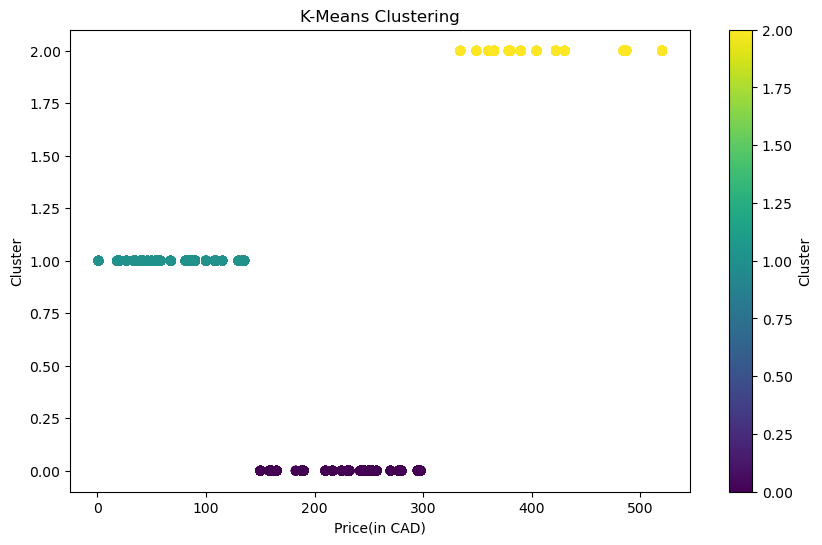

In [92]:
import matplotlib.pyplot as plt

# Scatter plot for K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(ebays_df['Price(in CAD)'], ebays_df['KMeans_Cluster'], c=ebays_df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Price(in CAD)')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster')
plt.show()


In [93]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
numerical_columns = ['Price(in CAD)']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ebays_df[numerical_columns])

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
ebays_df['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# Analyze cluster distribution
cluster_counts = ebays_df['GMM_Cluster'].value_counts()
print("Cluster Counts for Gaussian Mixture Models:")
print(cluster_counts)


Cluster Counts for Gaussian Mixture Models:
0    4222
1    2600
2    1476
Name: GMM_Cluster, dtype: int64


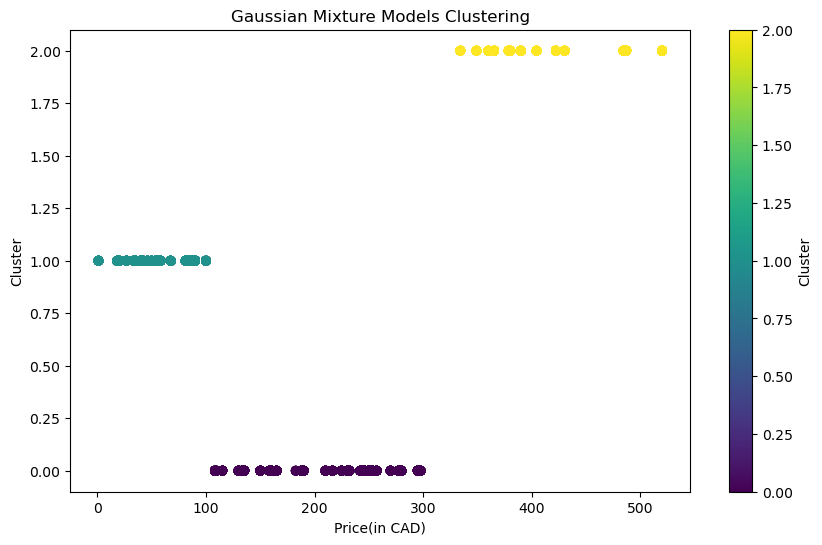

In [94]:
# Scatter plot for Gaussian Mixture Models clustering
plt.figure(figsize=(10, 6))
plt.scatter(ebays_df['Price(in CAD)'], ebays_df['GMM_Cluster'], c=ebays_df['GMM_Cluster'], cmap='viridis')
plt.title('Gaussian Mixture Models Clustering')
plt.xlabel('Price(in CAD)')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster')
plt.show()
